In [286]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
# Задаем некоторые опции библиотеки pandas, кот

# импортируем библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
df = pd.read_csv(r'C:\projects\Python\mlcourse_open\Lesson1\mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [228]:
df.head()

      age  gender  height  weight   ...    smoke  alco  active  cardio
id                                  ...                               
0   18393       2     168    62.0   ...        0     0       1       0
1   20228       1     156    85.0   ...        0     0       1       1
2   18857       1     165    64.0   ...        0     0       0       1
3   17623       2     169    82.0   ...        0     0       1       1
4   17474       1     156    56.0   ...        0     0       0       0

[5 rows x 12 columns]

In [19]:
df.groupby('gender')['height','weight'].mean()

,height,weight
gender,,
1,161.355612,72.565605
2,169.947895,77.257307


In [20]:
df.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [21]:
df.groupby('gender')['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

In [31]:
df.groupby('gender')['smoke'].value_counts(normalize = True)

gender  smoke
1       0        0.982144
        1        0.017856
2       0        0.781120
        1        0.218880
Name: smoke, dtype: float64

In [30]:
df[df['gender'] == 2]['alco'].count()

24470

In [34]:
pd.crosstab(df['gender'], df['alco'], normalize=True)

alco,0,1
gender,,
1,0.633843,0.016586
2,0.312386,0.037186


In [94]:
pd.crosstab(df['gender'], df['smoke'], normalize=True)

smoke,0,1
gender,,
1,0.638814,0.011614
2,0.273057,0.076514


In [40]:
df[(df['gender'] == 2) &(df['smoke'] == 1)]['height'].mean()

170.46079163554893

In [69]:
df['age'] = df['age'] * 12 

In [95]:
df['age'].mean()

53.33935839530379

In [97]:
df.groupby('smoke')['age'].median()

smoke
0    54.032877
1    52.397260
Name: age, dtype: float64

In [105]:
men_age_years_60_64 = df[(df['age'] > 60) & (df['age'] < 64) & (df['gender'] == 2) & (df['smoke'] == 1)].round()

In [106]:
men_age_years_60_64.head(10)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
90,61.0,2,171,97.0,150,100,3,1,1,0,1,1
248,62.0,2,174,74.0,130,80,3,1,1,0,1,1
410,61.0,2,173,70.0,130,70,2,1,1,1,1,0
456,62.0,2,170,66.0,150,80,1,1,1,0,1,1
581,64.0,2,162,70.0,130,70,1,1,1,1,1,1
606,62.0,2,182,91.0,120,80,1,1,1,0,1,0
662,60.0,2,175,92.0,120,80,3,1,1,1,1,1
696,60.0,2,160,85.0,130,90,2,1,1,0,0,1
986,62.0,2,171,108.0,161,73,1,1,1,0,1,1


In [107]:
Hol_low_ap_low = men_age_years_60_64[(men_age_years_60_64['ap_hi'] < 120) & (men_age_years_60_64['cholesterol'] == 1)]

In [112]:
Hol_Hi_ap_Hi = men_age_years_60_64[(men_age_years_60_64['ap_hi'] > 160) & (men_age_years_60_64['cholesterol'] == 3)]

In [124]:
Hol_low_ap_low.cardio.value_counts(normalize = True)

0    0.723404
1    0.276596
Name: cardio, dtype: float64

In [125]:
Hol_Hi_ap_Hi.cardio.value_counts(normalize = True)

1    1.0
Name: cardio, dtype: float64

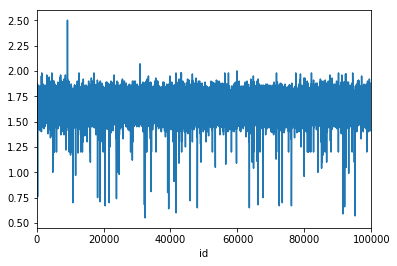

In [169]:
df['height'].plot();

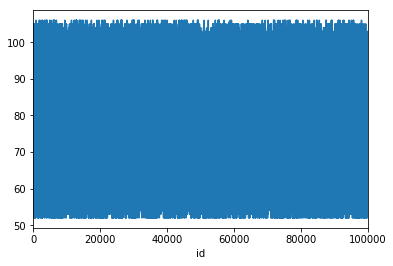

In [285]:
df['weight'].plot();

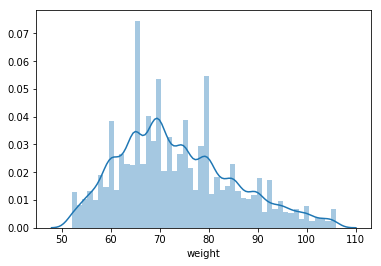

In [291]:
sns.distplot(df['weight']);

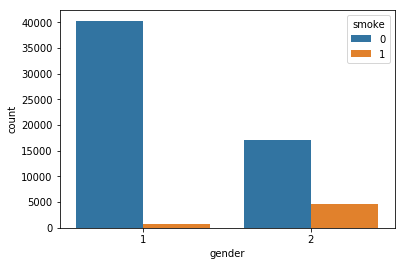

In [294]:
sns.countplot(x = 'gender', hue = 'smoke', data = df);

In [132]:
df.height = df.height * 100

In [135]:
df.height.head()

id
0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
Name: height, dtype: float64

In [136]:
df['IndexBMI'] = df['weight'] / df['height'] ** 2

In [139]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IndexBMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [141]:
df.IndexBMI.median()

26.37406812077498

In [142]:
df.groupby('gender')['IndexBMI'].mean()

gender
1    27.987583
2    26.754442
Name: IndexBMI, dtype: float64

In [143]:
df.groupby('cardio')['IndexBMI'].mean()

cardio
0    26.548175
1    28.566061
Name: IndexBMI, dtype: float64

In [149]:
df.groupby(['cardio','alco','gender'])['IndexBMI'].mean()

cardio  alco  gender
0       0     1         26.845407
              2         25.872638
        1     1         28.671457
              2         26.097220
1       0     1         29.052771
              2         27.522450
        1     1         30.812347
              2         28.226569
Name: IndexBMI, dtype: float64

In [150]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IndexBMI
id,,,,,,,,,,,,,
0,50.391781,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


In [282]:
df = df.drop(df[df['ap_lo'] > df['ap_hi']].index)

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62784 entries, 0 to 99999
Data columns (total 12 columns):
age            62784 non-null int64
gender         62784 non-null int64
height         62784 non-null int64
weight         62784 non-null float64
ap_hi          62784 non-null int64
ap_lo          62784 non-null int64
cholesterol    62784 non-null int64
gluc           62784 non-null int64
smoke          62784 non-null int64
alco           62784 non-null int64
active         62784 non-null int64
cardio         62784 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.2 MB


In [189]:
data_Series_height = df['height']

In [200]:
data_Series_height = df["height"].quantile(0.975)

In [210]:
df[df['height'] < df["height"].quantile(0.025)]

         age  gender  height  weight   ...    smoke  alco  active  cardio
id                                     ...                               
87     21752       1     148    80.0   ...        0     0       1       1
223    21135       1     148    53.0   ...        0     0       1       1
250    23312       1     148    50.0   ...        0     0       1       0
309    21800       2      76    55.0   ...        0     0       1       0
324    21377       1     149    60.0   ...        0     0       0       0
...      ...     ...     ...     ...   ...      ...   ...     ...     ...
99656  19540       1     147    68.0   ...        0     0       1       0
99673  17541       1     141    44.0   ...        0     0       1       0
99785  23646       1     149    49.0   ...        0     0       1       0
99901  15843       1     143    70.0   ...        0     0       1       1
99909  22608       1     149    61.0   ...        0     0       1       0

[1506 rows x 12 columns]

In [274]:
# df = df.drop(df[(df['height'] < df['height'].quantile(0.025)) & (df['height'] > df['height'].quantile(0.975))].index)
df = df.drop(df[df['height'] < df['height'].quantile(0.025)].index)                                                                                                             
                                                                                                               

In [275]:
df.describe()

                age        gender        height        weight      ...       \
count  67260.000000  67260.000000  67260.000000  67260.000000      ...        
mean   19447.627238      1.355233    164.824755     74.308703      ...        
std     2467.932921      0.478588      7.452736     14.220554      ...        
min    10798.000000      1.000000    150.000000     11.000000      ...        
25%    17637.000000      1.000000    160.000000     65.000000      ...        
50%    19691.000000      1.000000    165.000000     72.000000      ...        
75%    21311.000000      2.000000    170.000000     82.000000      ...        
max    23713.000000      2.000000    250.000000    200.000000      ...        

              smoke         alco        active        cardio  
count  67260.000000  67260.00000  67260.000000  67260.000000  
mean       0.089399      0.05397      0.803315      0.493860  
std        0.285321      0.22596      0.397495      0.499966  
min        0.000000      0.00000    

In [276]:
df = df.drop(df[df['height'] > df['height'].quantile(0.975)].index)

In [277]:
df.describe()

                age        gender        height        weight      ...       \
count  65859.000000  65859.000000  65859.000000  65859.000000      ...        
mean   19458.069451      1.343658    164.407537     73.981018      ...        
std     2466.497206      0.474932      6.933794     13.996192      ...        
min    10798.000000      1.000000    150.000000     11.000000      ...        
25%    17655.000000      1.000000    159.000000     65.000000      ...        
50%    19697.000000      1.000000    165.000000     72.000000      ...        
75%    21318.500000      2.000000    169.000000     82.000000      ...        
max    23713.000000      2.000000    180.000000    200.000000      ...        

              smoke          alco        active        cardio  
count  65859.000000  65859.000000  65859.000000  65859.000000  
mean       0.086473      0.052704      0.803641      0.493615  
std        0.281063      0.223443      0.397246      0.499963  
min        0.000000      0.00000

In [278]:
df = df.drop(df[df['weight'] < df["weight"].quantile(0.025)].index)

In [279]:
df.describe()

                age        gender        height        weight      ...       \
count  64384.000000  64384.000000  64384.000000  64384.000000      ...        
mean   19470.097089      1.348021    164.565358     74.580418      ...        
std     2461.693534      0.476346      6.879671     13.566415      ...        
min    10798.000000      1.000000    150.000000     52.000000      ...        
25%    17676.000000      1.000000    160.000000     65.000000      ...        
50%    19704.000000      1.000000    165.000000     72.000000      ...        
75%    21323.000000      2.000000    170.000000     82.000000      ...        
max    23713.000000      2.000000    180.000000    200.000000      ...        

              smoke          alco        active        cardio  
count  64384.000000  64384.000000  64384.000000  64384.000000  
mean       0.086900      0.053243      0.802870      0.498633  
std        0.281691      0.224519      0.397834      0.500002  
min        0.000000      0.00000

In [280]:
df = df.drop(df[df['weight'] > df["weight"].quantile(0.975)].index)

In [281]:
df.describe()

                age        gender        height        weight      ...       \
count  62784.000000  62784.000000  62784.000000  62784.000000      ...        
mean   19467.255782      1.346999    164.504460     73.483194      ...        
std     2462.844709      0.476019      6.853205     11.693401      ...        
min    10798.000000      1.000000    150.000000     52.000000      ...        
25%    17670.000000      1.000000    160.000000     65.000000      ...        
50%    19702.000000      1.000000    165.000000     72.000000      ...        
75%    21321.000000      2.000000    169.000000     81.000000      ...        
max    23713.000000      2.000000    180.000000    106.000000      ...        

              smoke          alco        active        cardio  
count  62784.000000  62784.000000  62784.000000  62784.000000  
mean       0.086121      0.052434      0.803517      0.493517  
std        0.280544      0.222902      0.397341      0.499962  
min        0.000000      0.00000